Simulation of a single path of a 1-D Wiener process (standard Brownian motion) over the interval [0, T].

0.00000, 0.00000
0.00100, -0.01080
0.00200, -0.00776
0.00300, -0.01880
0.00400, 0.02367
0.00500, 0.03672
0.00600, 0.04826
0.00700, -0.00392
0.00800, -0.02079
0.00900, -0.02481
0.01000, 0.00117
0.01100, 0.01653
0.01200, 0.01003
0.01300, 0.01084
0.01400, -0.01372
0.01500, 0.01036
0.01600, -0.02440
0.01700, -0.02992
0.01800, -0.06834
0.01900, -0.10669
0.02000, -0.15979
0.02100, -0.18805
0.02200, -0.12356
0.02300, -0.14529
0.02400, -0.07608
0.02500, -0.08126
0.02600, -0.09027
0.02700, -0.05983
0.02800, -0.02600
0.02900, -0.05432
0.03000, -0.12524
0.03100, -0.12724
0.03200, -0.14134
0.03300, -0.10836
0.03400, -0.14462
0.03500, -0.16108
0.03600, -0.17760
0.03700, -0.19400
0.03800, -0.15799
0.03900, -0.15443
0.04000, -0.17747
0.04100, -0.20492
0.04200, -0.25138
0.04300, -0.27456
0.04400, -0.23367
0.04500, -0.26103
0.04600, -0.25627
0.04700, -0.22784
0.04800, -0.25360
0.04900, -0.27404
0.05000, -0.29026
0.05100, -0.28447
0.05200, -0.32154
0.05300, -0.34811
0.05400, -0.36494
0.05500, -0.36471
0

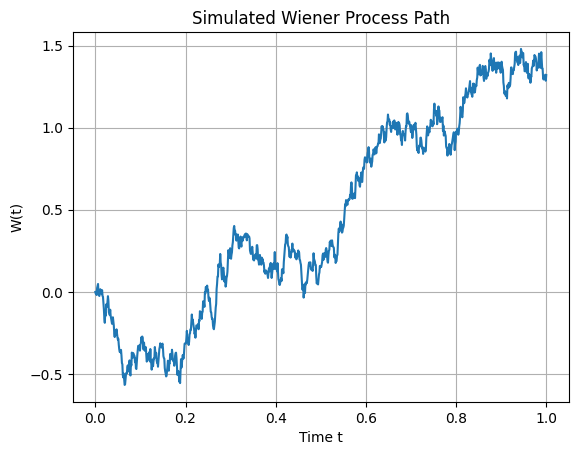

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0         # total time
N = 1000        # number of steps
dt = T / N      # time step
t = np.linspace(0, T, N+1)  # time grid

# Brownian increments: N(0, sqrt(dt))
dW = np.sqrt(dt) * np.random.randn(N)

# Brownian path: W(0)=0 + cumulative sum of increments
W = np.zeros(N+1)
W[1:] = np.cumsum(dW)

# Output the full simulated path (time and value)
for ti, wi in zip(t, W):
    print(f"{ti:.5f}, {wi:.5f}")

# Plot the path
plt.plot(t, W)
plt.title("Simulated Wiener Process Path")
plt.xlabel("Time t")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()




Simulate 5 paths in a single plot for the given Geometric Brownian Motion.


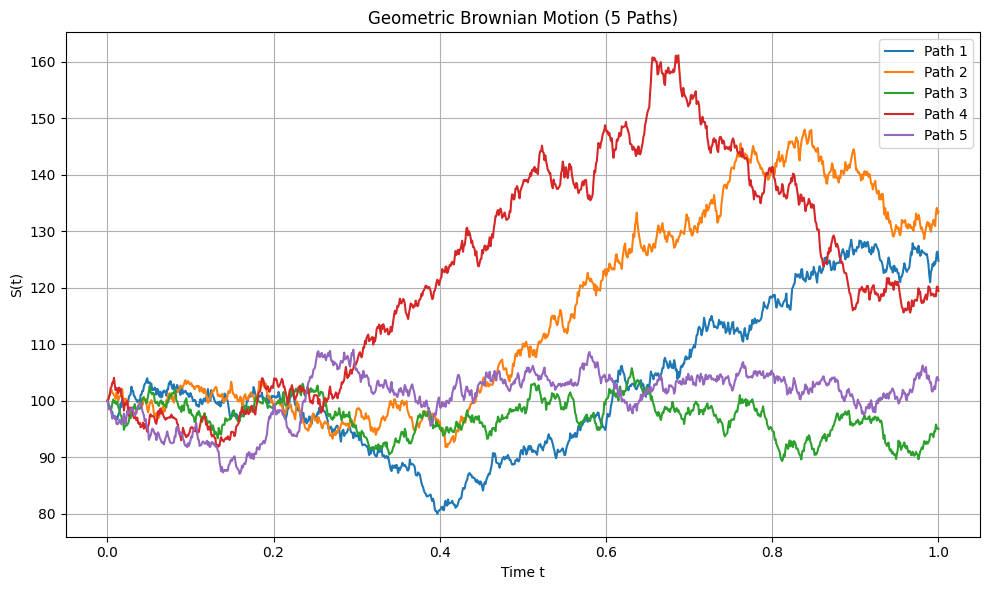

In [3]:
# Parameters
S0 = 100         # initial value
alpha = 0.05     # drift
sigma = 0.2      # volatility
T = 1.0          # total time
N = 1000         # number of steps
dt = T / N       # time step
t = np.linspace(0, T, N + 1)  # time grid
num_paths = 5    # number of paths to simulate

# Simulate GBM paths
paths = np.zeros((num_paths, N + 1))
for i in range(num_paths):
    dW = np.sqrt(dt) * np.random.randn(N)
    W = np.zeros(N + 1)
    W[1:] = np.cumsum(dW)
    S = S0 * np.exp(sigma * W + (alpha - 0.5 * sigma ** 2) * t) #given GBM
    paths[i] = S

# Plotting the 5 paths
plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(t, paths[i], label=f'Path {i+1}')
plt.title('Geometric Brownian Motion (5 Paths)')
plt.xlabel('Time(t)')
plt.ylabel('S(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Proof for standard Brownian motion, E[WsWt] = min(s, t) for s, t ≥ 0.

In [5]:

# Parameters
num_paths = 100000  # Number of simulated Brownian paths
max_t = 1.0         # Maximum time
time_steps = 1000    # Time discretization steps
dt = max_t / time_steps  # Time step size

# Time points (s < t)
s = 0.2
t = 0.8

# Generate Brownian increments: normal RV with mean 0, variance dt
increments = np.random.normal(0, np.sqrt(dt), size=(num_paths, time_steps))

# Construct Brownian paths via cumulative sum
brownian_paths = np.cumsum(increments, axis=1)

# Indices for s and t (accounting for 0-based indexing)
index_s = int(s / dt) - 1  # Position of W_s
index_t = int(t / dt) - 1  # Position of W_t

# Extract values at s and t
W_s = brownian_paths[:, index_s]
W_t = brownian_paths[:, index_t]

# Compute empirical expectation E[W_s W_t]
empirical_expectation = np.mean(W_s * W_t)

# Theoretical expectation (min(s,t))
theoretical_expectation = min(s, t)  # = s since s < t

print(f"Empirical E[W_s W_t]: {empirical_expectation:.6f}")
print(f"Theoretical min(s,t): {theoretical_expectation:.6f}")


Empirical E[W_s W_t]: 0.198849
Theoretical min(s,t): 0.200000


Let 0 ≤ s < t. Show that Wt −Ws is normally distributed with mean 0 and variance
t − s, and that increments over non-overlapping intervals are independent.

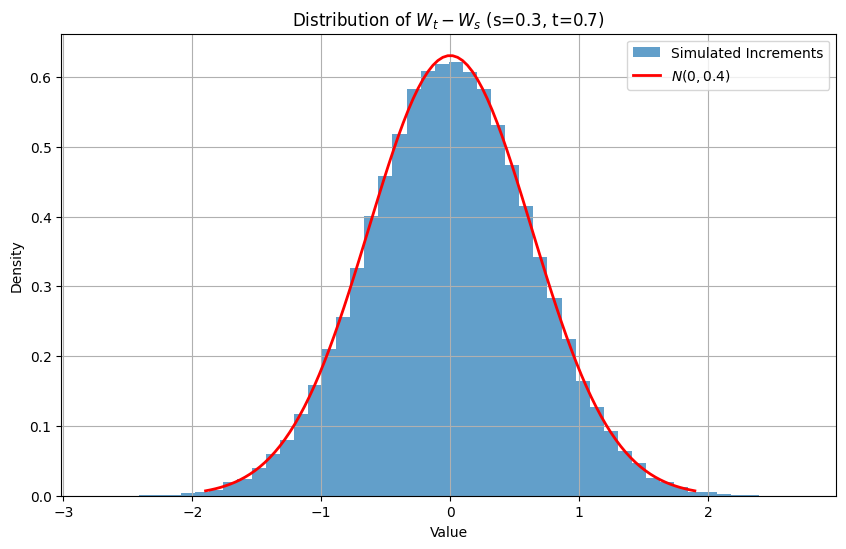

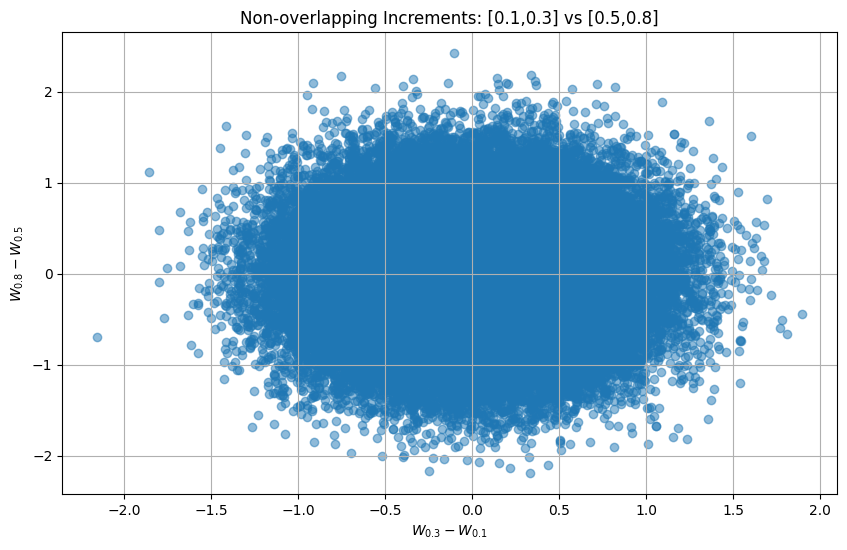

Properties of W_t - W_s (s=0.3, t=0.7):
• Theoretical mean: 0.0
• Sample mean: 0.003612
• Theoretical variance: 0.400000
• Sample variance: 0.398809

Independence of non-overlapping increments:
• Correlation coefficient: -0.000616
• P-value (H0: ρ=0): 0.845514
• Visual inspection: Scatter plot shows no relationship


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, pearsonr

# Simulation parameters
num_paths = 100000  # Number of Brownian paths
T = 1.0             # Total time
steps = 1000         # Time discretization
dt = T / steps       # Time step

# Time points (s < t)
s, t = 0.3, 0.7
variance = t - s

# Generate Brownian motion paths
dW = np.random.normal(0, np.sqrt(dt), (num_paths, steps))
W = np.cumsum(dW, axis=1)

# Get indices for time points
idx_s = int(s / dt)
idx_t = int(t / dt)

# Compute increments W_t - W_s
increments = W[:, idx_t] - W[:, idx_s]

# 1. Verify distribution of W_t - W_s
# Compute sample statistics
sample_mean = np.mean(increments)
sample_var = np.var(increments)

# Theoretical normal distribution
x = np.linspace(-3*np.sqrt(variance), 3*np.sqrt(variance), 100)
pdf = norm.pdf(x, 0, np.sqrt(variance))

# Plot histogram vs theoretical PDF
plt.figure(figsize=(10, 6))
plt.hist(increments, bins=50, density=True, alpha=0.7, label='Simulated Increments')
plt.plot(x, pdf, 'r-', lw=2, label=f'$N(0, {variance:.1f})$')
plt.title(f'Distribution of $W_t - W_s$ (s={s}, t={t})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# 2. Verify independence of non-overlapping increments
# Define two non-overlapping intervals [s1, t1] and [s2, t2]
s1, t1 = 0.1, 0.3  # First interval [0.1, 0.3]
s2, t2 = 0.5, 0.8  # Second interval [0.5, 0.8] (non-overlapping)

# Get indices
idx_s1 = int(s1 / dt)
idx_t1 = int(t1 / dt)
idx_s2 = int(s2 / dt)
idx_t2 = int(t2 / dt)

# Compute increments
inc1 = W[:, idx_t1] - W[:, idx_s1]  # W_{t1} - W_{s1}
inc2 = W[:, idx_t2] - W[:, idx_s2]  # W_{t2} - W_{s2}

# Calculate correlation
correlation, p_value = pearsonr(inc1, inc2)

# Scatter plot of increments
plt.figure(figsize=(10, 6))
plt.scatter(inc1, inc2, alpha=0.5)
plt.title(f'Non-overlapping Increments: [{s1},{t1}] vs [{s2},{t2}]')
plt.xlabel(f'$W_{{{t1}}} - W_{{{s1}}}$')
plt.ylabel(f'$W_{{{t2}}} - W_{{{s2}}}$')
plt.grid(True)
plt.show()

# results
print(f"Properties of W_t - W_s (s={s}, t={t}):")
print(f"• Theoretical mean: 0.0")
print(f"• Sample mean: {sample_mean:.6f}")
print(f"• Theoretical variance: {variance:.6f}")
print(f"• Sample variance: {sample_var:.6f}\n")

print("Independence of non-overlapping increments:")
print(f"• Correlation coefficient: {correlation:.6f}")
print(f"• P-value (H0: ρ=0): {p_value:.6f}")
print("• Visual inspection: Scatter plot shows no relationship")


For any t ≥ 0, E[Wt|Fs] = Ws for 0 ≤ s ≤ t. Conclude that Brownian motion is a martingale.

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


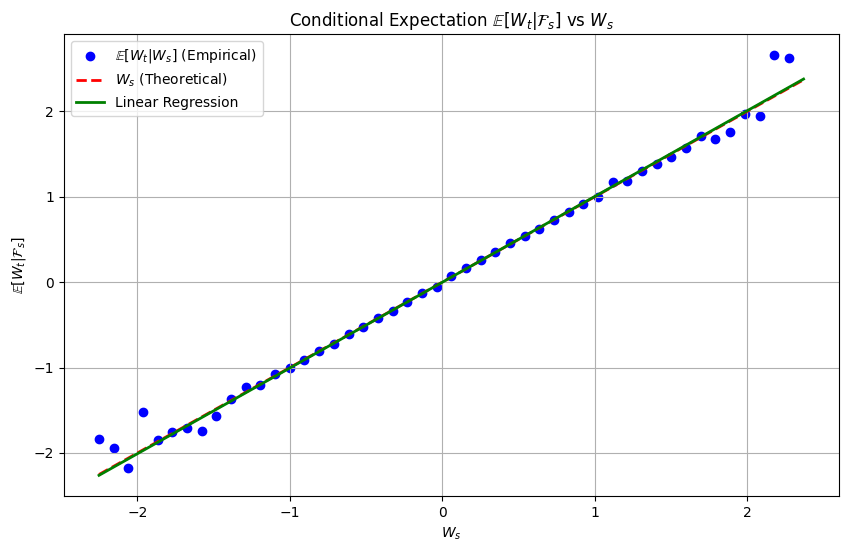

Regression analysis:
• Slope (β): 1.004084 (theoretical: 1.0)
• Intercept (α): -0.000553 (theoretical: 0.0)
• MSE between regression line and y=x: 0.000031


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
num_paths = 100000  # Number of Brownian paths
T = 1.0             # Total time
steps = 1000        # Time discretization
dt = T / steps      # Time step

# Time points (s < t)
s, t = 0.3, 0.7

# Generate Brownian motion paths
dW = np.random.normal(0, np.sqrt(dt), (num_paths, steps))
W = np.hstack([np.zeros((num_paths, 1)), np.cumsum(dW, axis=1)])

# Get indices for time points
idx_s = int(s / dt)
idx_t = int(t / dt)

# Extracted values at s and t
W_s = W[:, idx_s]
W_t = W[:, idx_t]


# 1. Verify E[W_t | F_s] = W_s
# Bin W_s values to compute conditional expectation
bins = np.linspace(np.min(W_s), np.max(W_s), 50)
bin_indices = np.digitize(W_s, bins)
conditional_means = np.array([np.mean(W_t[bin_indices == i]) for i in range(1, len(bins))])

# Bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

# Linear regression for comparison
slope = np.cov(W_s, W_t)[0, 1] / np.var(W_s)
intercept = np.mean(W_t) - slope * np.mean(W_s)
regression_line = slope * bin_centers + intercept

#2.Plot Results
plt.figure(figsize=(10, 6))
plt.scatter(bin_centers, conditional_means, color='blue', label=r'$\mathbb{E}[W_t | W_s]$ (Empirical)')
plt.plot(bin_centers, bin_centers, 'r--', lw=2, label=r'$W_s$ (Theoretical)')
plt.plot(bin_centers, regression_line, 'g-', lw=2, label='Linear Regression')
plt.title(r'Conditional Expectation $\mathbb{E}[W_t | \mathcal{F}_s]$ vs $W_s$')
plt.xlabel(r'$W_s$')
plt.ylabel(r'$\mathbb{E}[W_t | \mathcal{F}_s]$')
plt.legend()
plt.grid(True)
plt.show()

#3. regression results
print("Regression analysis:")
print(f"• Slope (β): {slope:.6f} (theoretical: 1.0)")
print(f"• Intercept (α): {intercept:.6f} (theoretical: 0.0)")
print(f"• MSE between regression line and y=x: {np.mean((regression_line - bin_centers)**2):.6f}")
